In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
data = pd.read_csv('Salary_Data.csv')

In [7]:
data.count()

YearsExperience    30
Salary             30
dtype: int64

In [8]:
data.dropna()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0
5,2.9,56642.0
6,3.0,60150.0
7,3.2,54445.0
8,3.2,64445.0
9,3.7,57189.0


In [9]:
data.count()

YearsExperience    30
Salary             30
dtype: int64

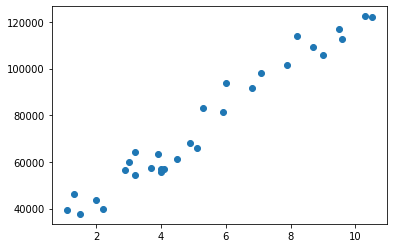

In [12]:
X = data[['YearsExperience']]
y = data[['Salary']]

plt.scatter(X,y)
plt.show()

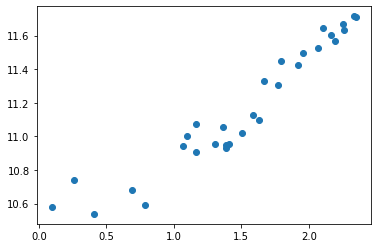

In [13]:
X_log = np.log(X)
y_log = np.log(y)

#plt_1 = plt.figure(figsize=(5,5))
plt.scatter(X_log,y_log,label='log')

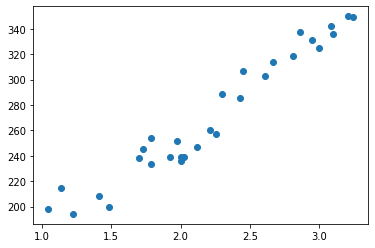

In [15]:
X_sqrt = np.sqrt(X)
y_sqrt = np.sqrt(y)

#plt2 = plt.figure(figsize=(5,5))
plt.scatter(X_sqrt,y_sqrt)

In [17]:
from sklearn.model_selection import train_test_split

#for linear model
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42, test_size = 0.1)

#for logarithimic model
X_train_log, X_test_log, y_train_log, y_test_log = train_test_split(X_log, y_log, random_state = 42, test_size = 0.1)


#for squared root model
X_train_sqrt, X_test_sqrt, y_train_sqrt, y_test_sqrt = train_test_split(X_sqrt, y_sqrt, random_state = 42, test_size = 0.1)


In [18]:
from sklearn.linear_model import LinearRegression

lm = LinearRegression()

lm_log = LinearRegression()

lm_sqrt = LinearRegression()

#linear
lm.fit(X_train, y_train)

#logarithmic
lm_log.fit(X_train_log, y_train_log)

#square root
lm_sqrt.fit(X_train_sqrt, y_train_sqrt)

LinearRegression()

In [19]:
y_pred = lm.predict(X_test)

#log
y_pred_log = lm_log.predict(X_test_log)

#sqrt
y_pred_sqrt = lm_sqrt.predict(X_test_sqrt)

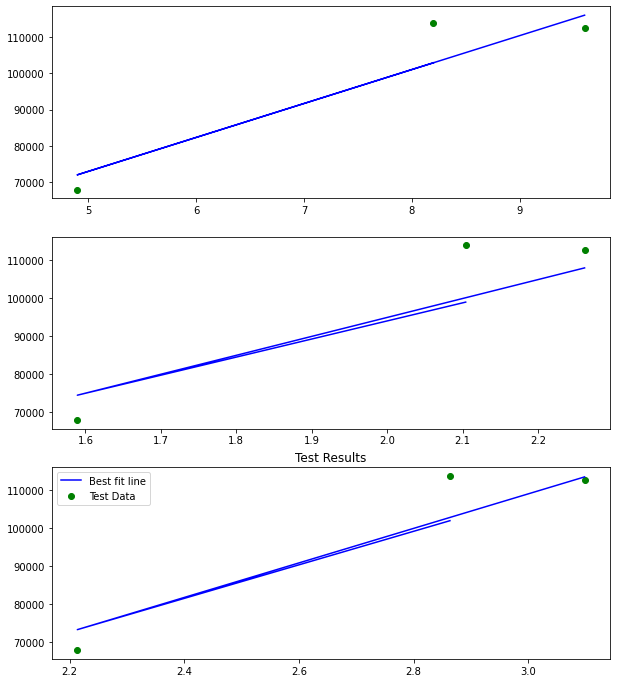

In [20]:
fig = plt.figure(figsize=(10,12))

plt.subplot(3,1,1)
plt.plot(X_test, y_pred, color='b', label='Best fit line')
plt.scatter(X_test, y_test, color='g', label='Test Data')

plt.subplot(3,1,2)
plt.plot(X_test_log, np.exp(y_pred_log), color='b', label='Best fit line')
plt.scatter(X_test_log, np.exp(y_test_log), color='g', label='Test Data')

plt.subplot(3,1,3)
plt.plot(X_test_sqrt, (y_pred_sqrt)**2, color='b', label='Best fit line')
plt.scatter(X_test_sqrt, (y_test_sqrt)**2, color='g', label='Test Data')

plt.title('Test Results')
plt.legend()
plt.show()

In [21]:
from sklearn.metrics import mean_squared_error

# Calculate and print Root Mean Square Error(RMSE)
#linear
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

#log
mse_log = mean_squared_error(y_test_log, y_pred_log)
rmse_log = np.sqrt(mse)

#sqrt
mse_sqrt = mean_squared_error(y_test_sqrt, y_pred_sqrt)
rmse_sqrt = np.sqrt(mse)


print('RMSE value:',rmse)
print('Log RMSE value:',rmse_log)
print('Sqrt RMSE value:',rmse_sqrt)

RMSE value: 6988.8090649421
Log RMSE value: 6988.8090649421
Sqrt RMSE value: 6988.8090649421
